<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Biểu đồ tròn, Box Plot, Scatter Plot và Bubble Plot

Thời gian ước tính cần: **30** phút

## Mục tiêu

Sau khi hoàn thành bài thực hành này, bạn sẽ có thể:

*   Khám phá thư viện Matplotlib thêm nữa
*   Tạo biểu đồ tròn, box plot, scatter plot và bubble plot

## Mục lục

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Khám phá bộ dữ liệu với *pandas*](#0)<br>
2.  [Tải về và chuẩn bị dữ liệu](#2)<br>
3.  [Trực quan hóa dữ liệu sử dụng Matplotlib](#4) <br>
4.  [Biểu đồ tròn](#6) <br>
5.  [Box Plot](#8) <br>
6.  [Scatter Plot](#10) <br>
7.  [Bubble Plot](#12) <br>

</div>

# Khám phá bộ dữ liệu với *pandas* và Matplotlib<a id="0"></a>

Công cụ: Khóa học chủ yếu dựa vào [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) và [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) để xử lý dữ liệu, phân tích và trực quan hóa. Thư viện vẽ đồ thị chính mà chúng ta sẽ khám phá trong khóa học này là [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Bộ dữ liệu: Di cư đến Canada từ năm 1980 đến 2013 - [Dòng di cư quốc tế đến và từ các quốc gia được chọn - Phiên bản 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) từ trang web của Liên Hợp Quốc.

Bộ dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế như được ghi nhận bởi các quốc gia điểm đến. Dữ liệu cung cấp cả dòng vào và dòng ra theo nơi sinh, quốc tịch hoặc nơi cư trú trước/tiếp theo, cho cả người nước ngoài và công dân. Trong bài thực hành này, chúng ta sẽ tập trung vào dữ liệu Di cư đến Canada.

# Tải về và chuẩn bị dữ liệu <a id="2"></a>

Điều đầu tiên chúng ta sẽ làm là cài đặt **openpyxl** (trước đây là **xlrd**), một module mà *pandas* yêu cầu để đọc các tệp Excel.

Import primary modules.


In [7]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [8]:
# Đọc file Excel từ thư mục hiện tại
df_can = pd.read_excel("Canada.xlsx",  # Chỉ cần tên file nếu file nằm trong cùng thư mục
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.


In [9]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's find out how many entries there are in our dataset.


In [10]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Làm sạch dữ liệu. Chúng ta sẽ thực hiện một số sửa đổi đối với bộ dữ liệu gốc để dễ dàng tạo các trực quan hóa của mình. Hãy tham khảo *Giới thiệu về Matplotlib và Biểu đồ đường* và *Biểu đồ diện tích, Biểu đồ tần suất và Biểu đồ cột* để có mô tả chi tiết về quá trình tiền xử lý này.

In [11]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can.columns = df_can.columns.astype(str)  # Chuyển đổi tên cột thành chuỗi
df_can['Total'] = df_can.loc[:, '1980':'2013'].sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib<a id="4"></a>

Import `Matplotlib`.


In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.10.0


# Biểu đồ tròn <a id="6"></a>

Biểu đồ tròn là một đồ họa hình tròn hiển thị tỷ lệ phần trăm số học bằng cách chia một vòng tròn (hoặc bánh) thành các lát có tỷ lệ. Bạn có lẽ đã quen thuộc với biểu đồ tròn vì nó được sử dụng rộng rãi trong kinh doanh và truyền thông. Chúng ta có thể tạo biểu đồ tròn trong Matplotlib bằng cách truyền từ khóa `kind=pie`.

Hãy sử dụng biểu đồ tròn để khám phá tỷ lệ (phần trăm) của những người nhập cư mới được phân theo các châu lục trong suốt thời gian từ 1980 đến 2013.

Bước 1: Thu thập dữ liệu.

Chúng ta sẽ sử dụng phương thức *pandas* `groupby` để tóm tắt dữ liệu di cư theo `Châu lục`. Quy trình chung của `groupby` bao gồm các bước sau:

1.  **Chia:** Chia dữ liệu thành các nhóm dựa trên một số tiêu chí.
2.  **Áp dụng:** Áp dụng một hàm cho mỗi nhóm một cách độc lập:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .v.v...
3.  **Kết hợp:** Kết hợp các kết quả thành một cấu trúc dữ liệu.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">


In [13]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\minh PC\AppData\Local\Temp\ipykernel_8040\1749182422.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()
C:\Users\minh PC\AppData\Local\Temp\ipykernel_8040\1749182422.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('Continent', axis=0)))


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Bước 2: Vẽ biểu đồ. Chúng ta sẽ truyền từ khóa `kind = 'pie'`, cùng với các tham số bổ sung sau:

*   `autopct` - là một chuỗi hoặc hàm được sử dụng để ghi nhãn các lát với giá trị số của chúng. Nhãn sẽ được đặt bên trong lát bánh. Nếu nó là một chuỗi định dạng, nhãn sẽ có dạng `fmt%pct`.
*   `startangle` - xoay điểm bắt đầu của biểu đồ tròn theo góc độ ngược chiều kim đồng hồ từ trục x.
*   `shadow` - Vẽ một bóng dưới biểu đồ tròn (để tạo cảm giác 3D).

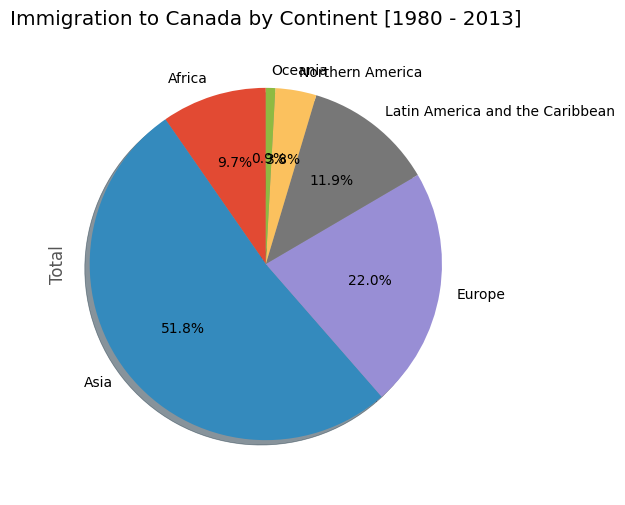

In [14]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Biểu đồ trên không rõ ràng lắm, số liệu và văn bản chồng lên nhau trong một số trường hợp. Hãy thực hiện một vài thay đổi để cải thiện hình ảnh:

*   Loại bỏ các nhãn văn bản trên biểu đồ tròn bằng cách truyền tham số `legend` và thêm nó vào một chú giải riêng biệt sử dụng `plt.legend()`.
*   Đẩy các tỷ lệ phần trăm ra ngoài biểu đồ tròn bằng cách truyền tham số `pctdistance`.
*   Truyền một bộ màu tùy chỉnh cho các châu lục bằng cách truyền tham số `colors`.
*   **Phóng to** biểu đồ tròn để nhấn mạnh ba châu lục có tỷ lệ thấp nhất (Châu Phi, Bắc Mỹ, và Mỹ Latinh và Caribe) bằng cách truyền tham số `explode`.

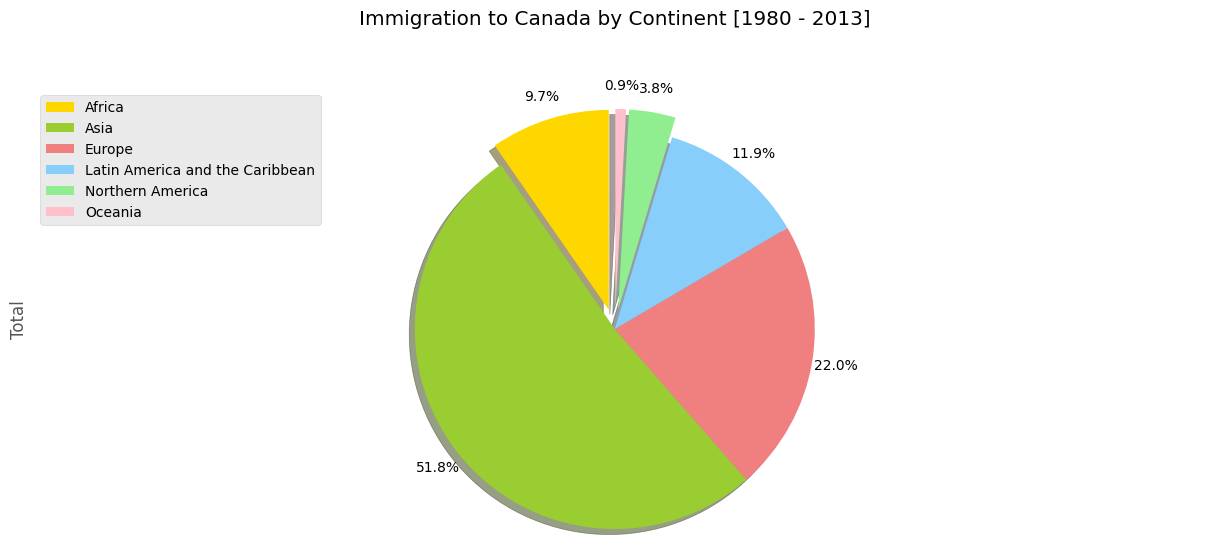

In [15]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Câu hỏi:** Sử dụng biểu đồ tròn, khám phá tỷ lệ (phần trăm) của những người nhập cư mới được phân theo các châu lục trong năm 2013.

**Lưu ý:** Bạn có thể cần điều chỉnh các giá trị phóng to (explode) để khắc phục việc chồng lấp các giá trị của các lát bánh.

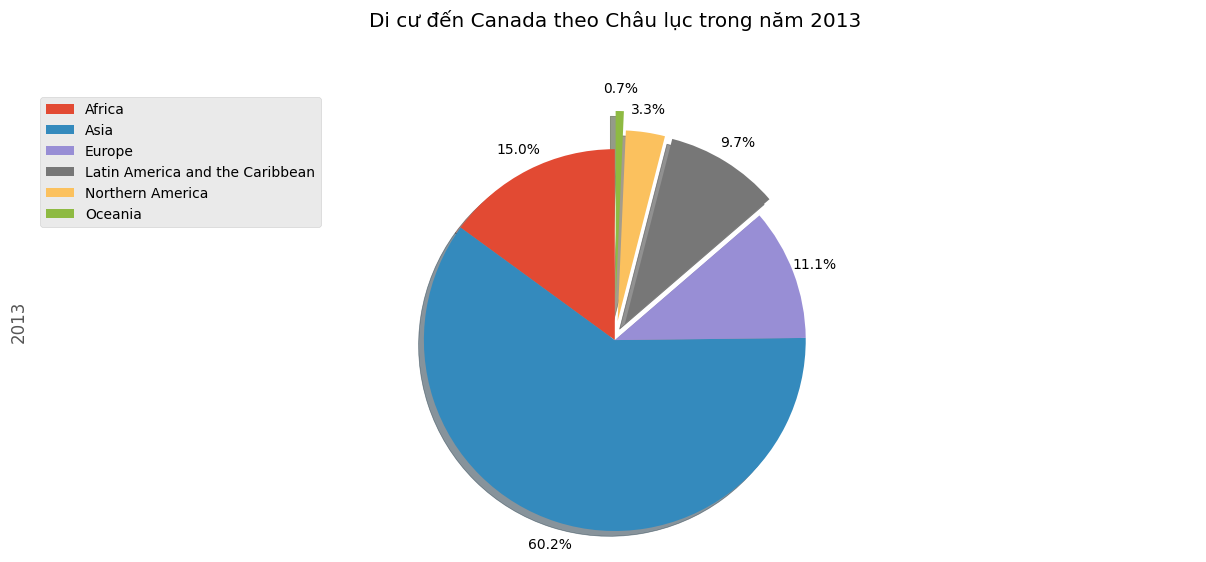

In [16]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # tỷ lệ cho mỗi châu lục với mục đích đẩy các lát bánh ra ngoài.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # tắt nhãn trên biểu đồ tròn
                            pctdistance=1.12,            # tỷ lệ giữa tâm biểu đồ và điểm bắt đầu của nhãn văn bản
                            explode=explode_list         # 'explode' ba châu lục có tỷ lệ thấp nhất
                            )

# tăng kích thước tiêu đề lên 12% để phù hợp với pctdistance
plt.title('Di cư đến Canada theo Châu lục trong năm 2013', y=1.12) 
plt.axis('equal') 

# thêm chú giải
plt.legend(labels=df_continents.index, loc='upper left') 

# hiển thị biểu đồ
plt.show()

# Box Plot <a id="8"></a>

Biểu đồ hộp (box plot) là một cách thể hiện thống kê phân phối của dữ liệu thông qua năm đại lượng chính:

*   **Giá trị nhỏ nhất (Minimum):** Số nhỏ nhất trong bộ dữ liệu, không bao gồm các giá trị ngoại lệ.
*   **Tứ phân vị thứ nhất (First quartile):** Số ở giữa giữa `minimum` và `median`.
*   **Tứ phân vị thứ hai (Median):** Số ở giữa của bộ dữ liệu đã được sắp xếp.
*   **Tứ phân vị thứ ba (Third quartile):** Số ở giữa giữa `median` và `maximum`.
*   **Giá trị lớn nhất (Maximum):** Số lớn nhất trong bộ dữ liệu, không bao gồm các giá trị ngoại lệ.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


Để tạo một `boxplot`, chúng ta có thể sử dụng `kind=box` trong phương thức `plot` gọi trên một *pandas* series hoặc dataframe.

Hãy vẽ biểu đồ hộp cho người nhập cư Nhật Bản trong khoảng thời gian từ 1980 - 2013.

Bước 1: Lấy một phần dữ liệu từ bộ dữ liệu. Mặc dù chúng ta chỉ trích xuất dữ liệu cho một quốc gia, nhưng chúng ta sẽ lấy nó dưới dạng một dataframe. Điều này sẽ giúp chúng ta gọi phương thức `dataframe.describe()` để xem các phân vị.

In [17]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Bước 2: Vẽ biểu đồ bằng cách truyền vào `kind='box'`.

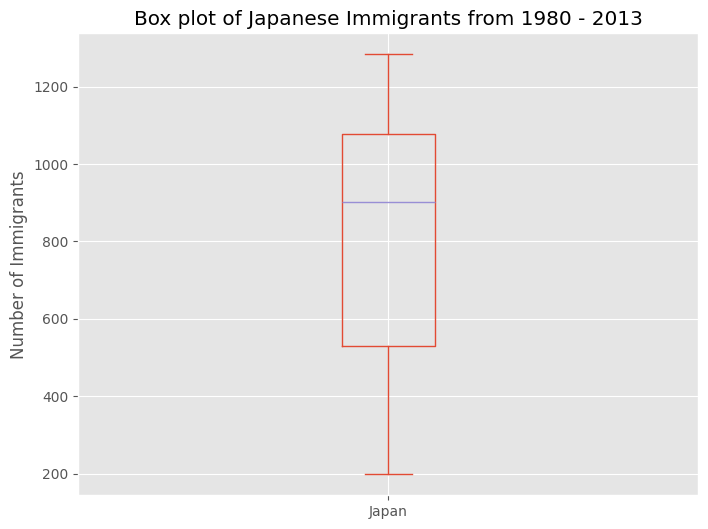

In [18]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Chúng ta có thể ngay lập tức rút ra một số quan sát chính từ biểu đồ trên:

1.  Số lượng người nhập cư nhỏ nhất là khoảng 200 (min), số lượng lớn nhất là khoảng 1300 (max), và số lượng người nhập cư trung vị là khoảng 900 (median).
2.  25% các năm trong khoảng thời gian từ 1980 - 2013 có số lượng người nhập cư hàng năm khoảng 500 hoặc ít hơn (Tứ phân vị thứ nhất).
3.  75% các năm trong khoảng thời gian từ 1980 - 2013 có số lượng người nhập cư hàng năm khoảng 1100 hoặc ít hơn (Tứ phân vị thứ ba).

Chúng ta có thể xem các con số thực tế bằng cách gọi phương thức `describe()` trên dataframe.

In [19]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Một trong những lợi ích chính của biểu đồ hộp là so sánh sự phân phối của nhiều bộ dữ liệu. Trong một trong các bài thực hành trước, chúng ta đã nhận thấy rằng Trung Quốc và Ấn Độ có xu hướng nhập cư rất giống nhau. Hãy phân tích thêm về hai quốc gia này bằng cách sử dụng biểu đồ hộp.

**Câu hỏi:** So sánh sự phân phối của số lượng người nhập cư mới từ Ấn Độ và Trung Quốc trong khoảng thời gian từ 1980 - 2013.

Bước 1: Lấy bộ dữ liệu cho Trung Quốc và Ấn Độ và gọi dataframe này là **df_CI**.

In [20]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Hãy xem các phân vị liên quan đến cả hai quốc gia bằng cách sử dụng phương thức `describe()`.

In [21]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Bước 2: Vẽ biểu đồ.

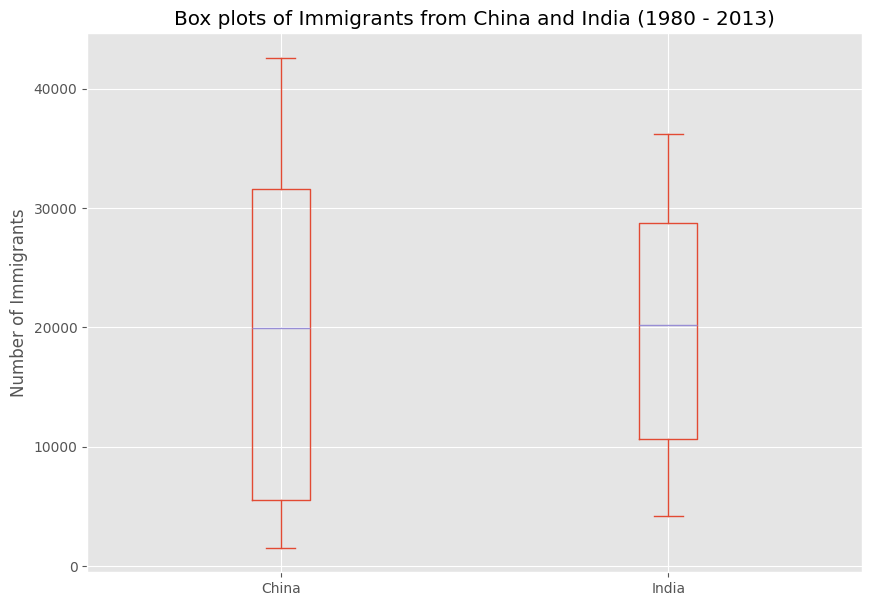

In [22]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

Chúng ta có thể quan sát rằng, mặc dù cả hai quốc gia có số lượng người nhập cư trung vị gần giống nhau (~20,000), phạm vi số lượng người nhập cư của Trung Quốc lại rộng hơn so với Ấn Độ. Số lượng người nhập cư tối đa của Ấn Độ trong một năm (36,210) thấp hơn khoảng 15% so với số lượng tối đa của Trung Quốc (42,584).

Nếu bạn muốn tạo các biểu đồ hộp ngang, bạn có thể truyền tham số `vert` trong hàm **plot** và gán giá trị cho *False*. Bạn cũng có thể chỉ định một màu khác nếu bạn không thích màu đỏ mặc định.

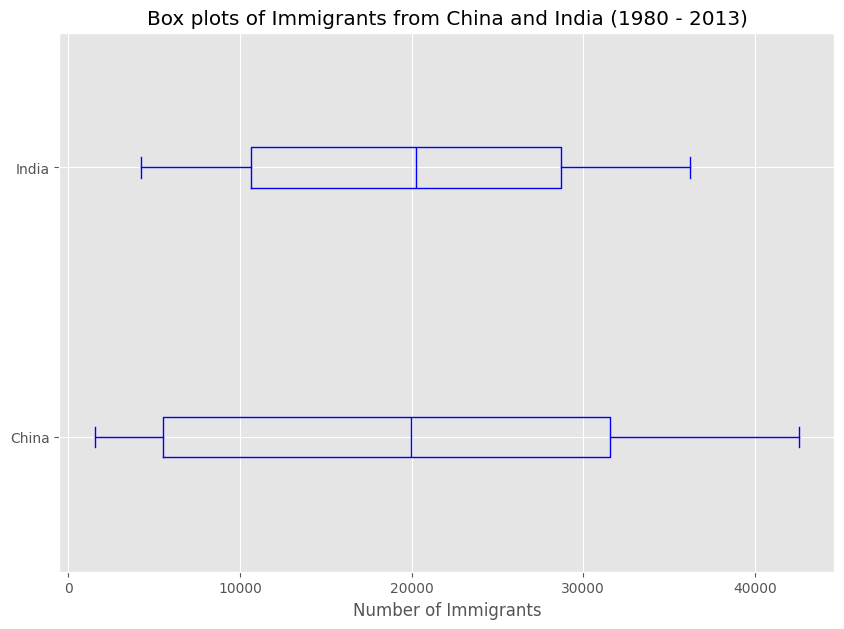

In [23]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Biểu đồ con (Subplots)**

Thường thì chúng ta có thể muốn vẽ nhiều biểu đồ trong cùng một hình. Ví dụ, chúng ta có thể muốn thực hiện việc so sánh song song giữa biểu đồ hộp và biểu đồ đường của di cư từ Trung Quốc và Ấn Độ.

Để trực quan hóa nhiều biểu đồ cùng một lúc, chúng ta có thể tạo một **`figure`** (nền tổng thể) và chia nó thành **`subplots`**, mỗi subplot chứa một biểu đồ. Với **subplots**, chúng ta thường làm việc với **artist layer** thay vì **scripting layer**.

Cú pháp thông thường là: <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Trong đó

*   `nrows` và `ncols` được sử dụng để chia nền hình thành các subplot theo dạng lưới (`nrows` * `ncols`),
*   `plot_number` được sử dụng để xác định subplot cụ thể mà hàm này sẽ tạo ra trong lưới hình. `plot_number` bắt đầu từ 1, tăng dần theo các hàng trước, và có giá trị tối đa là `nrows` * `ncols` như hình dưới đây.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">

Sau đó, chúng ta có thể chỉ định subplot để đặt mỗi biểu đồ bằng cách truyền tham số `ax` trong phương thức `plot()` như sau:


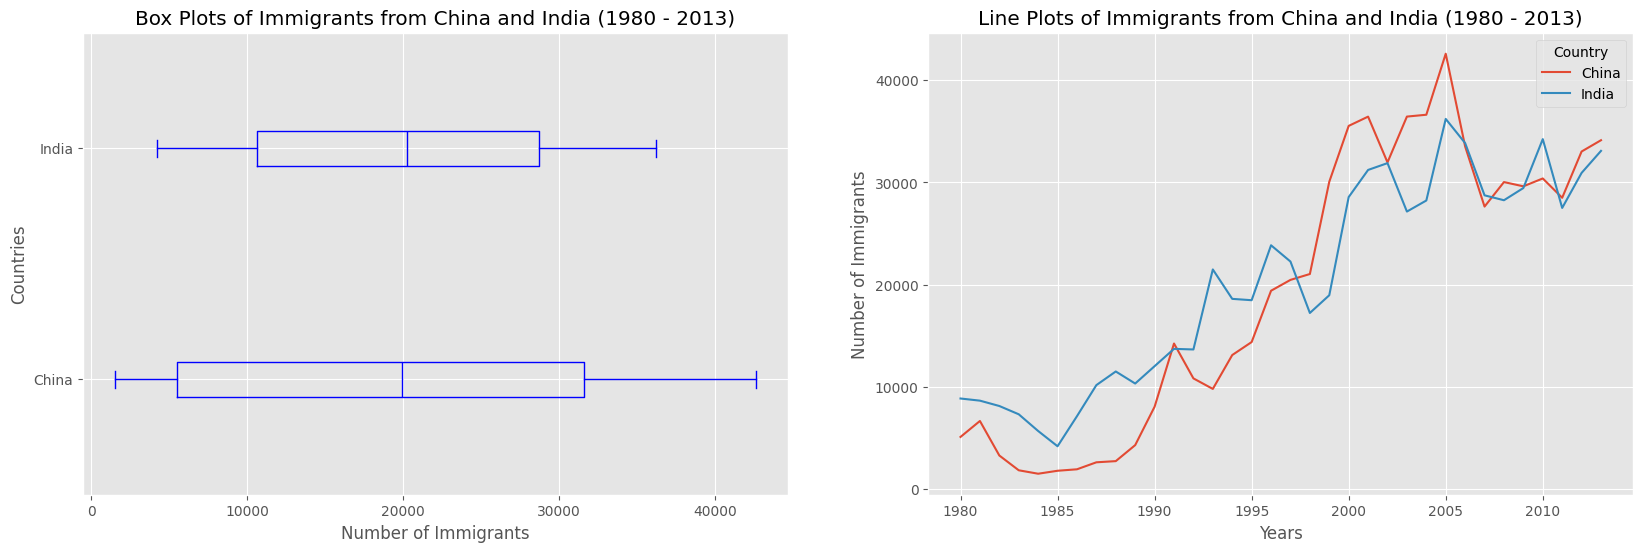

In [24]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Mẹo về quy ước subplot**

Trong trường hợp `nrows`, `ncols`, và `plot_number` đều nhỏ hơn 10, có một tiện ích cho phép sử dụng một số ba chữ số, trong đó chữ số hàng trăm đại diện cho `nrows`, chữ số hàng chục đại diện cho `ncols` và chữ số hàng đơn vị đại diện cho `plot_number`. Ví dụ:

```python
   subplot(211) == subplot(2, 1, 1) 
```

Tạo ra một subaxes trong một figure, biểu thị biểu đồ trên cùng (tức là biểu đồ đầu tiên) trong một lưới 2 hàng và 1 cột (lưới này không thực sự tồn tại, nhưng về mặt khái niệm, đây là cách subplot đã được định vị).

Hãy thử một bài toán phức tạp hơn một chút.

Trước đó, chúng ta đã xác định được 15 quốc gia đứng đầu dựa trên tổng số người nhập cư từ năm 1980 - 2013.

**Câu hỏi:** Tạo một box plot để trực quan hóa sự phân phối của 15 quốc gia đứng đầu (dựa trên tổng số người nhập cư) được nhóm theo các thập kỷ `1980s`, `1990s`, và `2000s`.

Bước 1: Lấy bộ dữ liệu. Lấy 15 quốc gia đứng đầu dựa trên tổng số người nhập cư. Đặt tên cho dataframe là **df_top15**.

In [25]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Bước 2: Tạo một dataframe mới chứa tổng hợp cho mỗi thập kỷ. Một cách để làm điều đó:

1.  Tạo một danh sách tất cả các năm trong các thập kỷ 80, 90 và 00.
2.  Cắt bộ dữ liệu gốc df_can để tạo một series cho mỗi thập kỷ và tính tổng qua tất cả các năm cho mỗi quốc gia.
3.  Kết hợp ba series vào một dataframe mới. Đặt tên cho dataframe của bạn là **new_df**.

In [26]:
# tạo một danh sách tất cả các năm trong các thập kỷ 80, 90 và 00
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# cắt bộ dữ liệu gốc df_can để tạo một series cho mỗi thập kỷ
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# kết hợp ba series vào một dataframe mới
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# hiển thị dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Hãy tìm hiểu thêm về các thống kê liên quan đến dataframe bằng cách sử dụng phương thức `describe()`.


In [27]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Bước 3: Vẽ biểu đồ hộp (box plot).


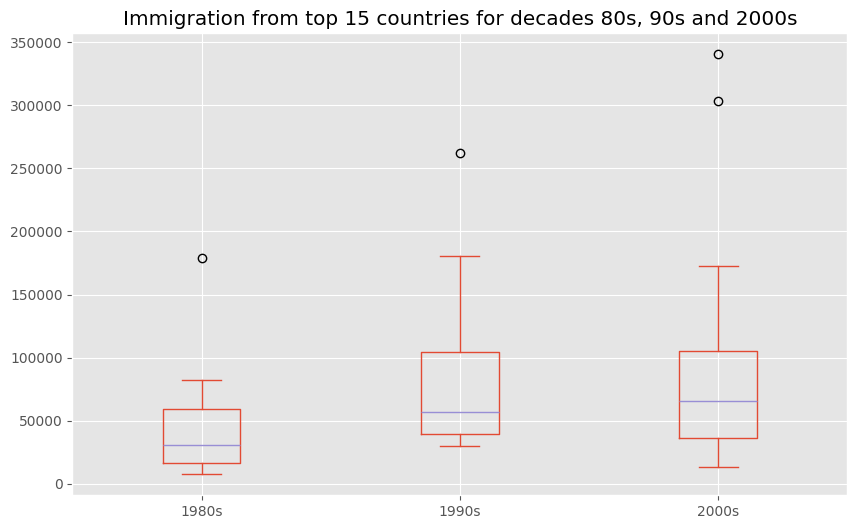

In [28]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:    
    new_df.plot(kind='box', figsize=(10, 6))

    plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

    plt.show()

```

</details>


Lưu ý cách biểu đồ hộp (box plot) khác biệt so với bảng tóm tắt đã tạo. Biểu đồ hộp quét qua dữ liệu và xác định các giá trị ngoại lệ (outliers). Để trở thành một giá trị ngoại lệ, giá trị dữ liệu phải:

*   Lớn hơn Q3 ít nhất 1.5 lần phạm vi giữa các tứ phân vị (IQR), hoặc,
*   Nhỏ hơn Q1 ít nhất 1.5 lần IQR.

Hãy xem thập kỷ 2000s làm ví dụ:

*   Q1 (25%) = 36,101.5 
*   Q3 (75%) = 105,505.5 
*   IQR = Q3 - Q1 = 69,404 

Sử dụng định nghĩa về ngoại lệ, bất kỳ giá trị nào lớn hơn Q3 thêm 1.5 lần IQR sẽ được đánh dấu là ngoại lệ.

Ngoại lệ > 105,505.5 + (1.5 * 69,404)  
Ngoại lệ > 209,611.5

In [29]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


Trung Quốc và Ấn Độ đều được coi là ngoại lệ vì dân số của họ trong thập kỷ vượt quá 209,611.5.

Biểu đồ hộp là một công cụ trực quan hóa nâng cao, và có nhiều tùy chọn và tùy chỉnh vượt quá phạm vi của bài thực hành này. Vui lòng tham khảo [tài liệu Matplotlib](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#matplotlib.pyplot.boxplot) về biểu đồ hộp để biết thêm chi tiết.

# Biểu đồ phân tán (Scatter Plots) <a id="10"></a>

Biểu đồ phân tán (2D) là một phương pháp hữu ích để so sánh các biến với nhau. Biểu đồ phân tán trông giống như biểu đồ đường (line plots) vì cả hai đều vẽ các biến độc lập và phụ thuộc trên một đồ thị 2D. Trong khi các điểm dữ liệu được nối với nhau bằng một đường trong biểu đồ đường, thì chúng không được nối trong biểu đồ phân tán. Dữ liệu trong biểu đồ phân tán được coi là thể hiện một xu hướng. Với việc phân tích thêm bằng các công cụ như hồi quy (regression), chúng ta có thể tính toán mối quan hệ này một cách toán học và sử dụng nó để dự đoán xu hướng ngoài bộ dữ liệu.

Hãy bắt đầu bằng cách khám phá điều sau:

Sử dụng một `biểu đồ phân tán`, hãy trực quan hóa xu hướng tổng số người nhập cư vào Canada (tất cả các quốc gia kết hợp) trong các năm từ 1980 - 2013.

Bước 1: Lấy bộ dữ liệu. Vì chúng ta đang dự đoán sử dụng mối quan hệ giữa `năm` và `tổng dân số`, chúng ta sẽ chuyển đổi `năm` thành kiểu dữ liệu `int`.


In [30]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Bước 2: Vẽ biểu đồ. Trong `Matplotlib`, chúng ta có thể tạo một biểu đồ phân tán (scatter plot) bằng cách truyền vào tham số `kind='scatter'` như một đối số vẽ đồ thị. Chúng ta cũng cần truyền vào các từ khóa `x` và `y` để chỉ định các cột sẽ được đặt trên trục x và trục y.

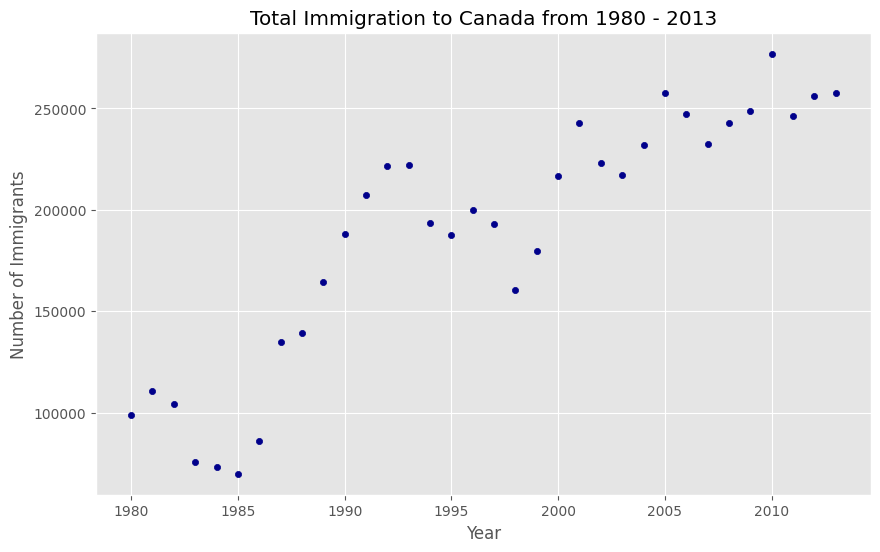

In [31]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Lưu ý rằng biểu đồ phân tán không nối các điểm dữ liệu lại với nhau. Chúng ta có thể thấy rõ một xu hướng đi lên trong dữ liệu: khi các năm trôi qua, tổng số người nhập cư tăng lên. Chúng ta có thể phân tích toán học xu hướng đi lên này bằng cách sử dụng một đường hồi quy (đường phù hợp nhất).

Vậy hãy thử vẽ một đường hồi quy tuyến tính phù hợp nhất và sử dụng nó để dự đoán số lượng người nhập cư vào năm 2015.

Bước 1: Lấy phương trình của đường phù hợp nhất. Chúng ta sẽ sử dụng phương thức `polyfit()` của **Numpy** bằng cách truyền vào các tham số sau:

*   `x`: tọa độ x của dữ liệu.
*   `y`: tọa độ y của dữ liệu.
*   `deg`: Bậc của đa thức phù hợp. 1 = tuyến tính, 2 = bậc 2, và cứ thế.


In [32]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Kết quả trả về là một mảng chứa các hệ số của đa thức, với các bậc cao nhất đứng trước.

Vì chúng ta đang vẽ một đường hồi quy tuyến tính `y = a * x + b`, kết quả của chúng ta có 2 phần tử `[5.56709228e+03, -1.09261952e+07]` với độ dốc ở vị trí 0 và giá trị chặn (intercept) ở vị trí 1.

Bước 2: Vẽ đường hồi quy trên `biểu đồ phân tán`.


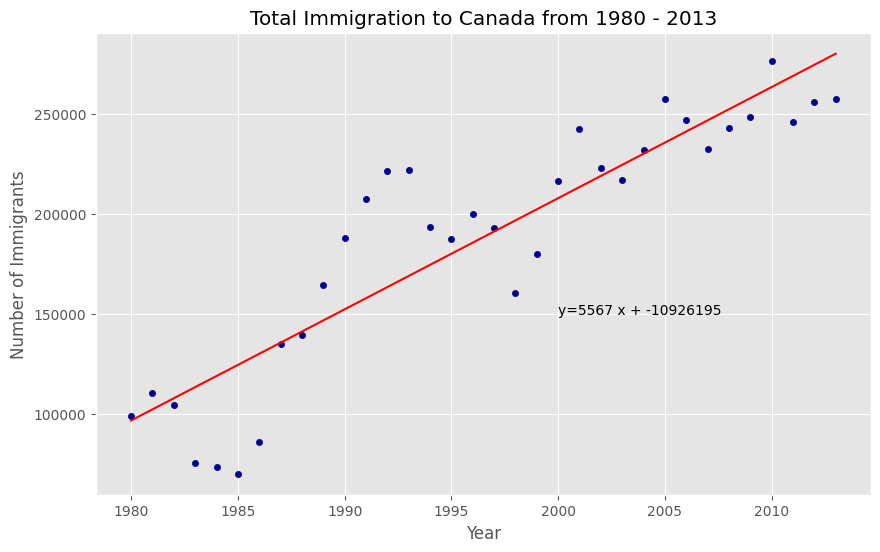

'No. Immigrants = 5567 * Year + -10926195'

In [33]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Sử dụng phương trình của đường hồi quy phù hợp nhất, chúng ta có thể ước tính số lượng người nhập cư vào năm 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

Khi so sánh với số liệu thực tế từ Báo cáo hàng năm 2016 của Bộ Công dân và Di cư Canada (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), chúng ta thấy rằng Canada đã chấp nhận 271,845 người nhập cư vào năm 2015. Giá trị ước tính của chúng ta là 291,310, nằm trong khoảng 7% so với số liệu thực tế, điều này khá tốt khi xét đến việc dữ liệu gốc của chúng ta đến từ Liên Hợp Quốc (và có thể hơi khác một chút so với dữ liệu của CIC).

Lưu ý thêm, chúng ta có thể nhận thấy rằng nhập cư đã giảm mạnh vào khoảng thời gian từ 1993 - 1997. Phân tích sâu hơn về vấn đề này cho thấy vào năm 1993, Canada đã giới thiệu Dự luật C-86, trong đó có các sửa đổi đối với hệ thống xác định người tị nạn, chủ yếu là hạn chế. Các sửa đổi tiếp theo đối với Quy định về Di cư đã hủy bỏ yêu cầu bảo lãnh cho "người thân được hỗ trợ" và giảm điểm dành cho họ, khiến việc gia đình (ngoài gia đình hạt nhân) nhập cư vào Canada trở nên khó khăn hơn. Các biện pháp hạn chế này đã có tác động trực tiếp đến số lượng người nhập cư trong vài năm tiếp theo.

**Câu hỏi**: Tạo một biểu đồ phân tán (scatter plot) về tổng số người nhập cư từ Đan Mạch, Na Uy và Thụy Điển vào Canada từ năm 1980 đến 2013?

**Bước 1**: Lấy dữ liệu:

1.  Tạo một dataframe chỉ chứa dữ liệu của Đan Mạch, Na Uy và Thụy Điển. Đặt tên là **df_countries**.
2.  Tính tổng số người nhập cư qua ba quốc gia này cho mỗi năm và chuyển kết quả thành một dataframe. Đặt tên dataframe mới này là **df_total**.
3.  Đặt lại chỉ mục (index) tại chỗ.
4.  Đổi tên các cột thành **year** và **total**.
5.  Hiển thị dataframe kết quả.


In [34]:
# tạo dataframe df_countries
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# tạo df_total bằng cách tính tổng qua ba quốc gia cho mỗi năm
df_total = pd.DataFrame(df_countries.sum(axis=1))

# đặt lại chỉ mục tại chỗ
df_total.reset_index(inplace=True)

# đổi tên các cột
df_total.columns = ['year', 'total']

# chuyển cột year từ chuỗi thành kiểu int để tạo biểu đồ phân tán
df_total['year'] = df_total['year'].astype(int)

# hiển thị dataframe kết quả
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


**Bước 2**: Tạo biểu đồ phân tán bằng cách vẽ tổng số người nhập cư so với năm trong **df_total**.


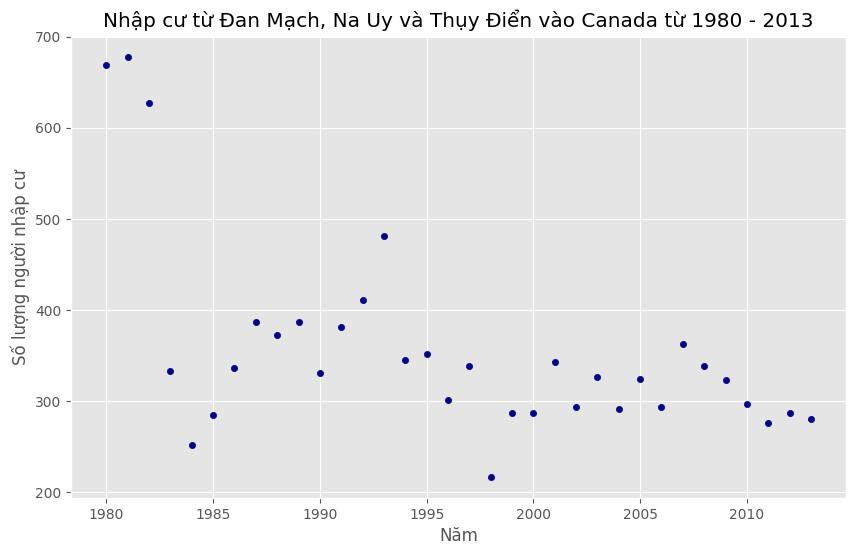

In [35]:
# tạo biểu đồ phân tán
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# thêm tiêu đề và nhãn cho các trục
plt.title('Nhập cư từ Đan Mạch, Na Uy và Thụy Điển vào Canada từ 1980 - 2013')
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')

# hiển thị biểu đồ
plt.show()

# Biểu đồ bong bóng (Bubble Plots) <a id="12"></a>

Biểu đồ bong bóng (bubble plot) là một biến thể của biểu đồ phân tán (scatter plot) hiển thị ba chiều dữ liệu (x, y, z). Các điểm dữ liệu được thay thế bằng các bong bóng, và kích thước của bong bóng được xác định bởi biến thứ ba `z`, còn được gọi là trọng số. Trong `matplotlib`, chúng ta có thể truyền một mảng hoặc giá trị vô hướng vào tham số `s` trong phương thức `plot()`, chứa trọng số của mỗi điểm.

**Hãy bắt đầu bằng việc phân tích tác động của cuộc Đại suy thoái ở Argentina.**

Argentina đã chịu đựng một cuộc Đại suy thoái từ năm 1998 đến 2002, gây ra tình trạng thất nghiệp lan rộng, các cuộc bạo loạn, sự sụp đổ của chính phủ và sự vỡ nợ của nợ công quốc gia. Về mặt thu nhập, hơn 50% người Argentina sống trong cảnh nghèo đói, và bảy trên mười trẻ em Argentina sống trong cảnh nghèo vào thời điểm sâu sắc của cuộc khủng hoảng vào năm 2002.

Hãy phân tích tác động của cuộc khủng hoảng này và so sánh nhập cư của Argentina với quốc gia láng giềng Brazil. Chúng ta sẽ làm điều đó bằng cách sử dụng một `biểu đồ bong bóng` về nhập cư từ Brazil và Argentina trong các năm từ 1980 - 2013. Chúng ta sẽ thiết lập trọng số cho bong bóng là giá trị *chuẩn hóa* của dân số cho mỗi năm.

**Bước 1**: Lấy dữ liệu cho Brazil và Argentina. Giống như trong ví dụ trước, chúng ta sẽ chuyển đổi `Năm` thành kiểu int và đưa nó vào dataframe.

In [36]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Bước 2**: Tạo trọng số chuẩn hóa.

Có nhiều phương pháp chuẩn hóa trong thống kê, mỗi phương pháp có một ứng dụng riêng. Trong trường hợp này, chúng ta sẽ sử dụng [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) để đưa tất cả các giá trị vào phạm vi \[0, 1]. Công thức chung là:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

Trong đó, $X$ là giá trị gốc, $X'$ là giá trị chuẩn hóa tương ứng. Công thức này đặt giá trị lớn nhất trong bộ dữ liệu thành 1 và đặt giá trị nhỏ nhất thành 0. Các điểm dữ liệu còn lại sẽ được chuẩn hóa vào một giá trị trong khoảng từ 0 đến 1 tương ứng.

In [37]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Bước 3**: Vẽ biểu đồ.

*   Để vẽ hai biểu đồ phân tán khác nhau trong một biểu đồ, chúng ta có thể bao gồm trục của một biểu đồ vào biểu đồ còn lại bằng cách truyền nó qua tham số `ax`.
*   Chúng ta cũng sẽ truyền trọng số bằng tham số `s`. Vì trọng số đã được chuẩn hóa nằm trong khoảng từ 0 đến 1, chúng sẽ không hiển thị rõ trên biểu đồ. Do đó, chúng ta sẽ:
    *   nhân trọng số với 2000 để phóng đại nó trên đồ thị, và,
    *   thêm 10 để bù đắp cho giá trị min (có trọng số là 0 và do đó sẽ được phóng đại với $\times 2000$).

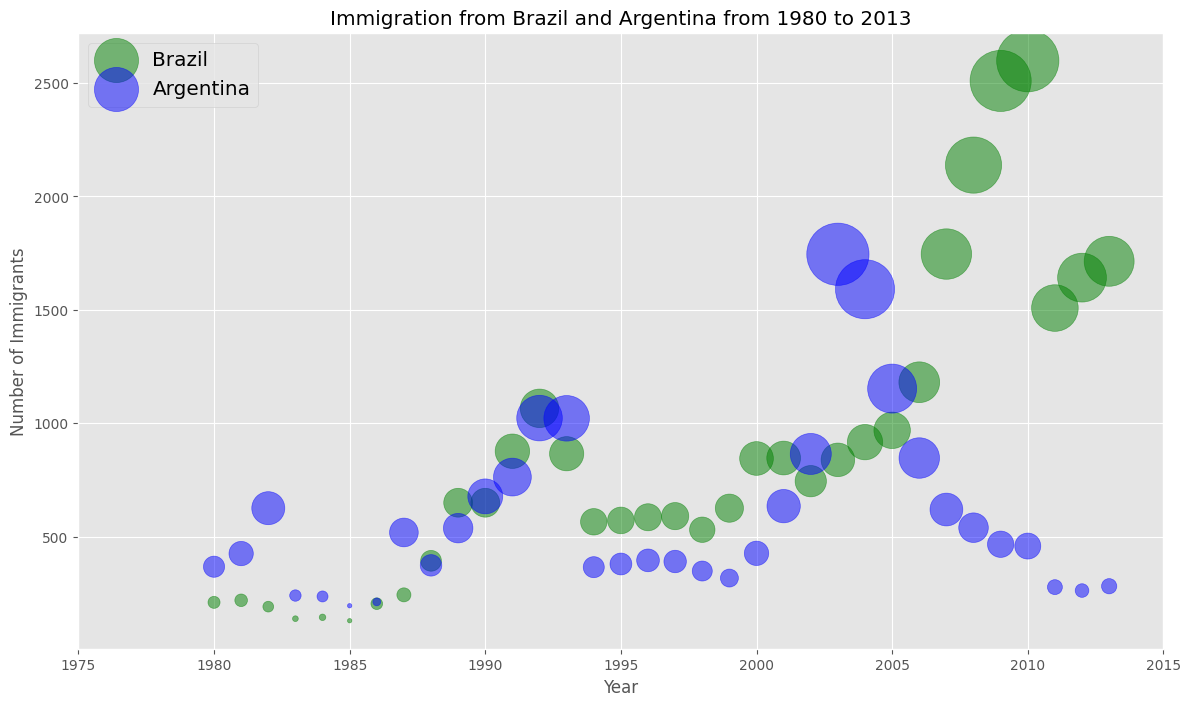

In [38]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Kích thước của bong bóng tương ứng với quy mô của dân số nhập cư trong năm đó, so với dữ liệu từ năm 1980 đến 2013. Bong bóng càng lớn, số lượng người nhập cư trong năm đó càng nhiều.

Từ biểu đồ trên, chúng ta có thể thấy sự gia tăng tương ứng trong nhập cư từ Argentina trong suốt cuộc Đại suy thoái 1998 - 2002. Chúng ta cũng có thể quan sát một đợt tăng tương tự từ khoảng năm 1985 đến 1993. Thực tế, Argentina đã chịu đựng một cuộc Đại suy thoái lớn từ năm 1974 đến 1990, ngay trước khi cuộc Đại suy thoái 1998 - 2002 xảy ra.

Tương tự, Brazil đã trải qua *Hiệu ứng Samba* khi đồng real của Brazil (tiền tệ) giảm gần 35% vào năm 1999. Có nỗi lo sợ về một cuộc khủng hoảng tài chính Nam Mỹ vì nhiều quốc gia Nam Mỹ phụ thuộc nặng nề vào xuất khẩu công nghiệp từ Brazil. Chính phủ Brazil sau đó đã áp dụng một chương trình thắt lưng buộc bụng, và nền kinh tế từ từ phục hồi qua các năm, đạt đỉnh vào năm 2010. Dữ liệu nhập cư phản ánh những sự kiện này.

**Câu hỏi**: Trước đó trong bài thực hành này, chúng ta đã tạo biểu đồ hộp để so sánh nhập cư từ Trung Quốc và Ấn Độ vào Canada. Hãy tạo biểu đồ bong bóng (bubble plots) về nhập cư từ Trung Quốc và Ấn Độ để trực quan hóa bất kỳ sự khác biệt nào theo thời gian từ 1980 đến 2013. Bạn có thể sử dụng **df_can_t** mà chúng ta đã định nghĩa và sử dụng trong ví dụ trước.

**Bước 1**: Chuẩn hóa dữ liệu liên quan đến Trung Quốc và Ấn Độ.

In [39]:
# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

**Bước 2**: Tạo biểu đồ bong bóng (bubble plots).

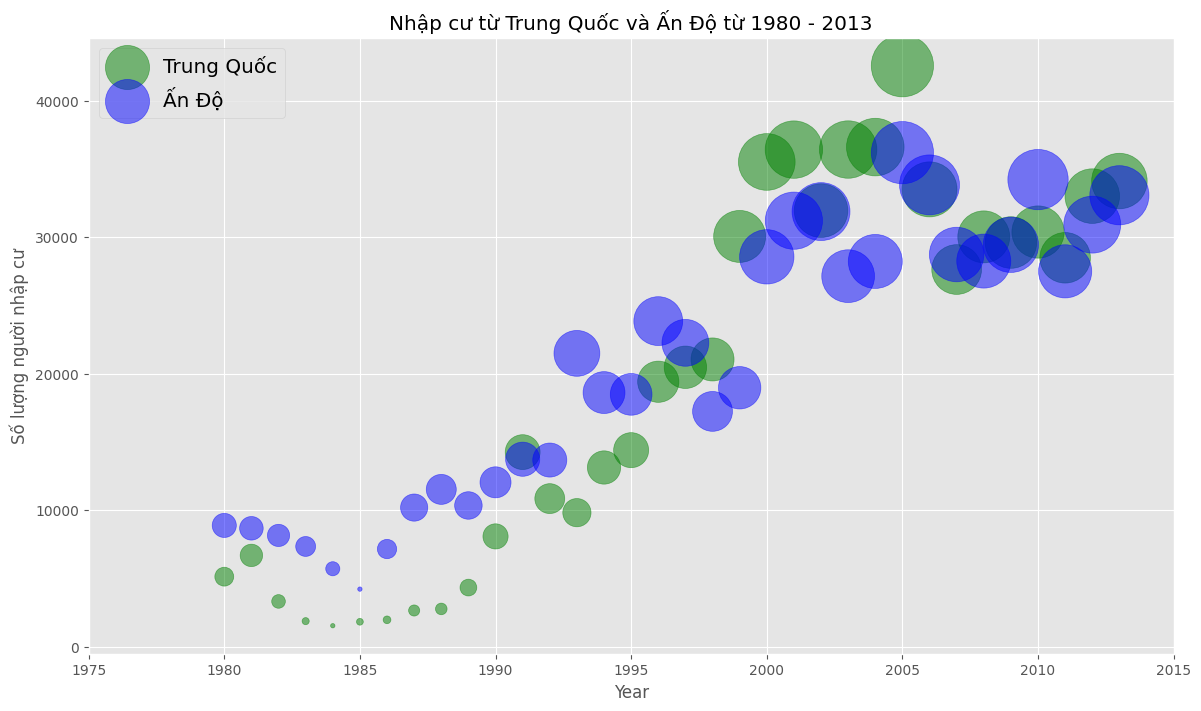

In [40]:
# Trung Quốc
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # độ trong suốt
                    color='green',
                    s=norm_china * 2000 + 10,  # truyền trọng số
                    xlim=(1975, 2015)
                   )

# Ấn Độ
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Số lượng người nhập cư')
ax0.set_title('Nhập cư từ Trung Quốc và Ấn Độ từ 1980 - 2013')
ax0.legend(['Trung Quốc', 'Ấn Độ'], loc='upper left', fontsize='x-large')

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Alex Aklson</a>

### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By   | Change Description                 |
| ----------------- | ------- | ------------ | ---------------------------------- |
| 2021-05-29        | 2.6     | Weiqing Wang | Fixed typos and code smells.       |
| 2021-01-20        | 2.5     | LakshmiHolla | Changed TOC markdown section       |
| 2021-01-05        | 2.4     | LakshmiHolla | Changed markdown for outliers      |
| 2020-11-12        | 2.3     | LakshmiHolla | Added example code for outliers    |
| 2020-11-03        | 2.2     | LakshmiHolla | Changed URL of excel file          |
| 2020-09-29        | 2.1     | LakshmiHolla | Made fix to a boxplot label        |
| 2020-08-27        | 2.0     | Lavanya      | Moved lab to course repo in GitLab |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
